In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ROOT = os.path.join("/home", "niche", "COLO")
DIR_V8 = os.path.join("/projects", "niche_squad", "yolov8")
DIR_V9 = os.path.join(ROOT, "yolov9", "out")
RUNS = ["run_%d" % i for i in range(8)]

In [3]:
data = dict()
for k, v in zip(["v8", "v9"], [DIR_V8, DIR_V9]):  
    h = 0 if k == "v8" else None
    data[k] = pd.read_csv(os.path.join(v, RUNS[0], "results.csv"), header=h)
    for i in range(1, len(RUNS)):
        data_new = pd.read_csv(os.path.join(v, RUNS[i], "results.csv"), header=h)
        data[k] = pd.concat([data[k], data_new])

In [4]:
# set headers for v9 from v8
data["v9"].columns = data["v8"].columns
data_out = pd.concat([data["v8"], data["v9"]])
print(data_out) # 5951

      map5095     map50  precision    recall        f1  n_all  n_fn  n_fp  \
0    0.113400  0.258000   0.576600  0.227100  0.325800    709   635     5   
1    0.109000  0.236500   0.508000  0.221400  0.308400    709   512   336   
2    0.120900  0.242700   0.513200  0.218600  0.306600    709   545   109   
3    0.144500  0.289600   0.478400  0.259500  0.336500    709   499   235   
4    0.147200  0.291300   0.514000  0.269400  0.353500    709   486   272   
..        ...       ...        ...       ...       ...    ...   ...   ...   
259  0.694095  0.965134   0.920330  0.937063  0.928621   1430    90   116   
260  0.752460  0.981376   0.938011  0.962937  0.950311   1430    53    91   
261  0.257308  0.495287   0.835821  0.394922  0.536398    709   429    55   
262  0.197472  0.391543   0.716418  0.338505  0.459770    709   469    95   
263  0.180914  0.327194   0.594366  0.297602  0.396617    709   498   144   

           config     model    n  
0    1a_angle_t2s   yolov8n   16  
1    

In [5]:
# count each cateogory (config,model,n)
data["v8"].groupby(["config", "model", "n"]).aggregate(["count"]).reset_index()

,config,model,n,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp
,,,,count,count,count,count,count,count,count,count
0,1a_angle_t2s,yolov8m,16,67,67,67,67,67,67,67,67
1,1a_angle_t2s,yolov8m,32,67,67,67,67,67,67,67,67
2,1a_angle_t2s,yolov8m,64,67,67,67,67,67,67,67,67
3,1a_angle_t2s,yolov8m,128,67,67,67,67,67,67,67,67
4,1a_angle_t2s,yolov8m,256,67,67,67,67,67,67,67,67
...,...,...,...,...,...,...,...,...,...,...,...
82,4_all,yolov8x,32,61,61,61,61,61,61,61,61
83,4_all,yolov8x,64,60,60,60,60,60,60,60,60
84,4_all,yolov8x,128,60,60,60,60,60,60,60,60


In [6]:
data["v9"].groupby(["config", "model", "n"]).aggregate(["count"]).reset_index()

,config,model,n,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp
,,,,count,count,count,count,count,count,count,count
0,1a_angle_t2s,yolov9-c,16,42,42,42,42,42,42,42,42
1,1a_angle_t2s,yolov9-c,32,42,42,42,42,42,42,42,42
2,1a_angle_t2s,yolov9-c,64,42,42,42,42,42,42,42,42
3,1a_angle_t2s,yolov9-c,128,42,42,42,42,42,42,42,42
4,1a_angle_t2s,yolov9-c,256,41,41,41,41,41,41,41,41
5,1a_angle_t2s,yolov9-c,500,41,41,41,41,41,41,41,41
6,1a_angle_t2s,yolov9-e,16,40,40,40,40,40,40,40,40
7,1a_angle_t2s,yolov9-e,32,40,40,40,40,40,40,40,40
8,1a_angle_t2s,yolov9-e,64,40,40,40,40,40,40,40,40


In [7]:
p = 5 * 3 * 5 # n size x models x datasets
print("number of iterations in V8: %.2f" % (len(data["v8"]) / p))
p = 5 * 2 * 5 # n size x models x datasets
print("number of iterations in v9: %.2f" % (len(data["v9"]) / p))
data["v9"].query("model=='yolov9-c' and config == '1a_angle_t2s' and n == 16")

number of iterations in V8: 74.95
number of iterations in v9: 44.20


,map5095,map50,precision,recall,f1,n_all,n_fn,n_fp,config,model,n
0,0.255836,0.493107,0.709443,0.413258,0.522282,709,416,120,1a_angle_t2s,yolov9-c,16
58,0.231424,0.463009,0.693002,0.433004,0.532986,709,402,136,1a_angle_t2s,yolov9-c,16
116,0.181372,0.385047,0.644279,0.365303,0.466247,709,450,143,1a_angle_t2s,yolov9-c,16
174,0.228060,0.441884,0.824916,0.345557,0.487078,709,464,52,1a_angle_t2s,yolov9-c,16
232,0.228581,0.446035,0.592453,0.442877,0.506860,709,395,216,1a_angle_t2s,yolov9-c,16
290,0.198280,0.395981,0.676301,0.330042,0.443602,709,475,112,1a_angle_t2s,yolov9-c,16
0,0.247410,0.478859,0.675381,0.437236,0.530822,709,399,149,1a_angle_t2s,yolov9-c,16
58,0.271651,0.531727,0.764286,0.452750,0.568645,709,388,99,1a_angle_t2s,yolov9-c,16
116,0.206238,0.410333,0.735849,0.330042,0.455696,709,475,84,1a_angle_t2s,yolov9-c,16
174,0.253914,0.523249,0.593496,0.514810,0.551360,709,344,250,1a_angle_t2s,yolov9-c,16


<AxesSubplot: xlabel='n', ylabel='map50'>

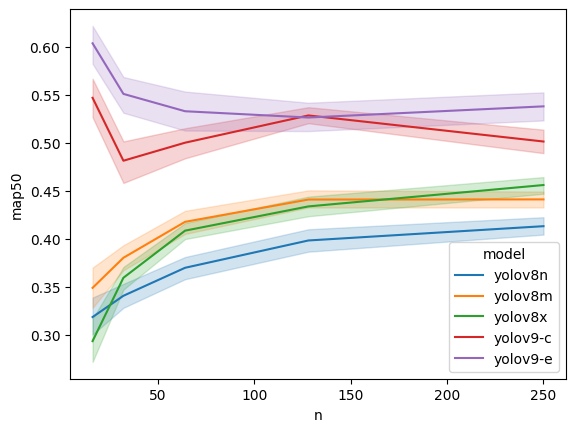

In [6]:
# config: 1a_angle_t2s, 1b_angle_s2t, 2_light
sns.lineplot(data=data_out.query("config == '3_breed'"), x="n", y="map50", hue="model",)

<AxesSubplot: xlabel='n', ylabel='map50'>

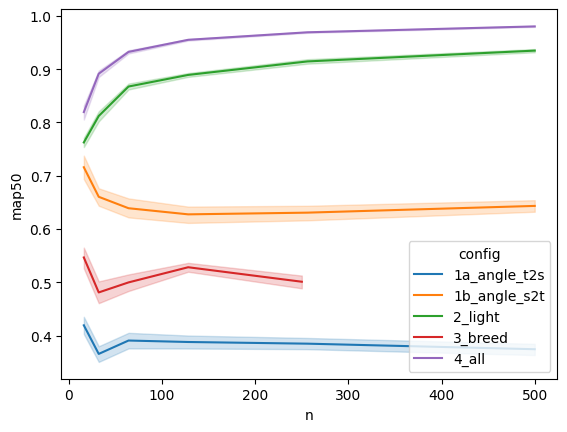

In [7]:
# config: 1a_angle_t2s, 1b_angle_s2t, 2_light
sns.lineplot(data=data_out.query("model == 'yolov9-c'"), x="n", y="map50", hue="config",)

In [9]:
data_out.to_csv("out_0304.csv", index=False)

In [8]:
data_long = data_out.melt(id_vars=["model", "config", "n"], 
                      var_name="metric", 
                      value_name="value",)
data_long

,model,config,n,metric,value
0,yolov8n,1a_angle_t2s,16,map5095,0.1134
1,yolov8n,1a_angle_t2s,32,map5095,0.1090
2,yolov8n,1a_angle_t2s,64,map5095,0.1209
3,yolov8n,1a_angle_t2s,128,map5095,0.1445
4,yolov8n,1a_angle_t2s,256,map5095,0.1472
...,...,...,...,...,...
62611,yolov9-c,4_all,128,n_fp,131.0000
62612,yolov9-c,4_all,256,n_fp,116.0000
62613,yolov9-c,4_all,500,n_fp,91.0000
62614,yolov9-e,1a_angle_t2s,16,n_fp,55.0000


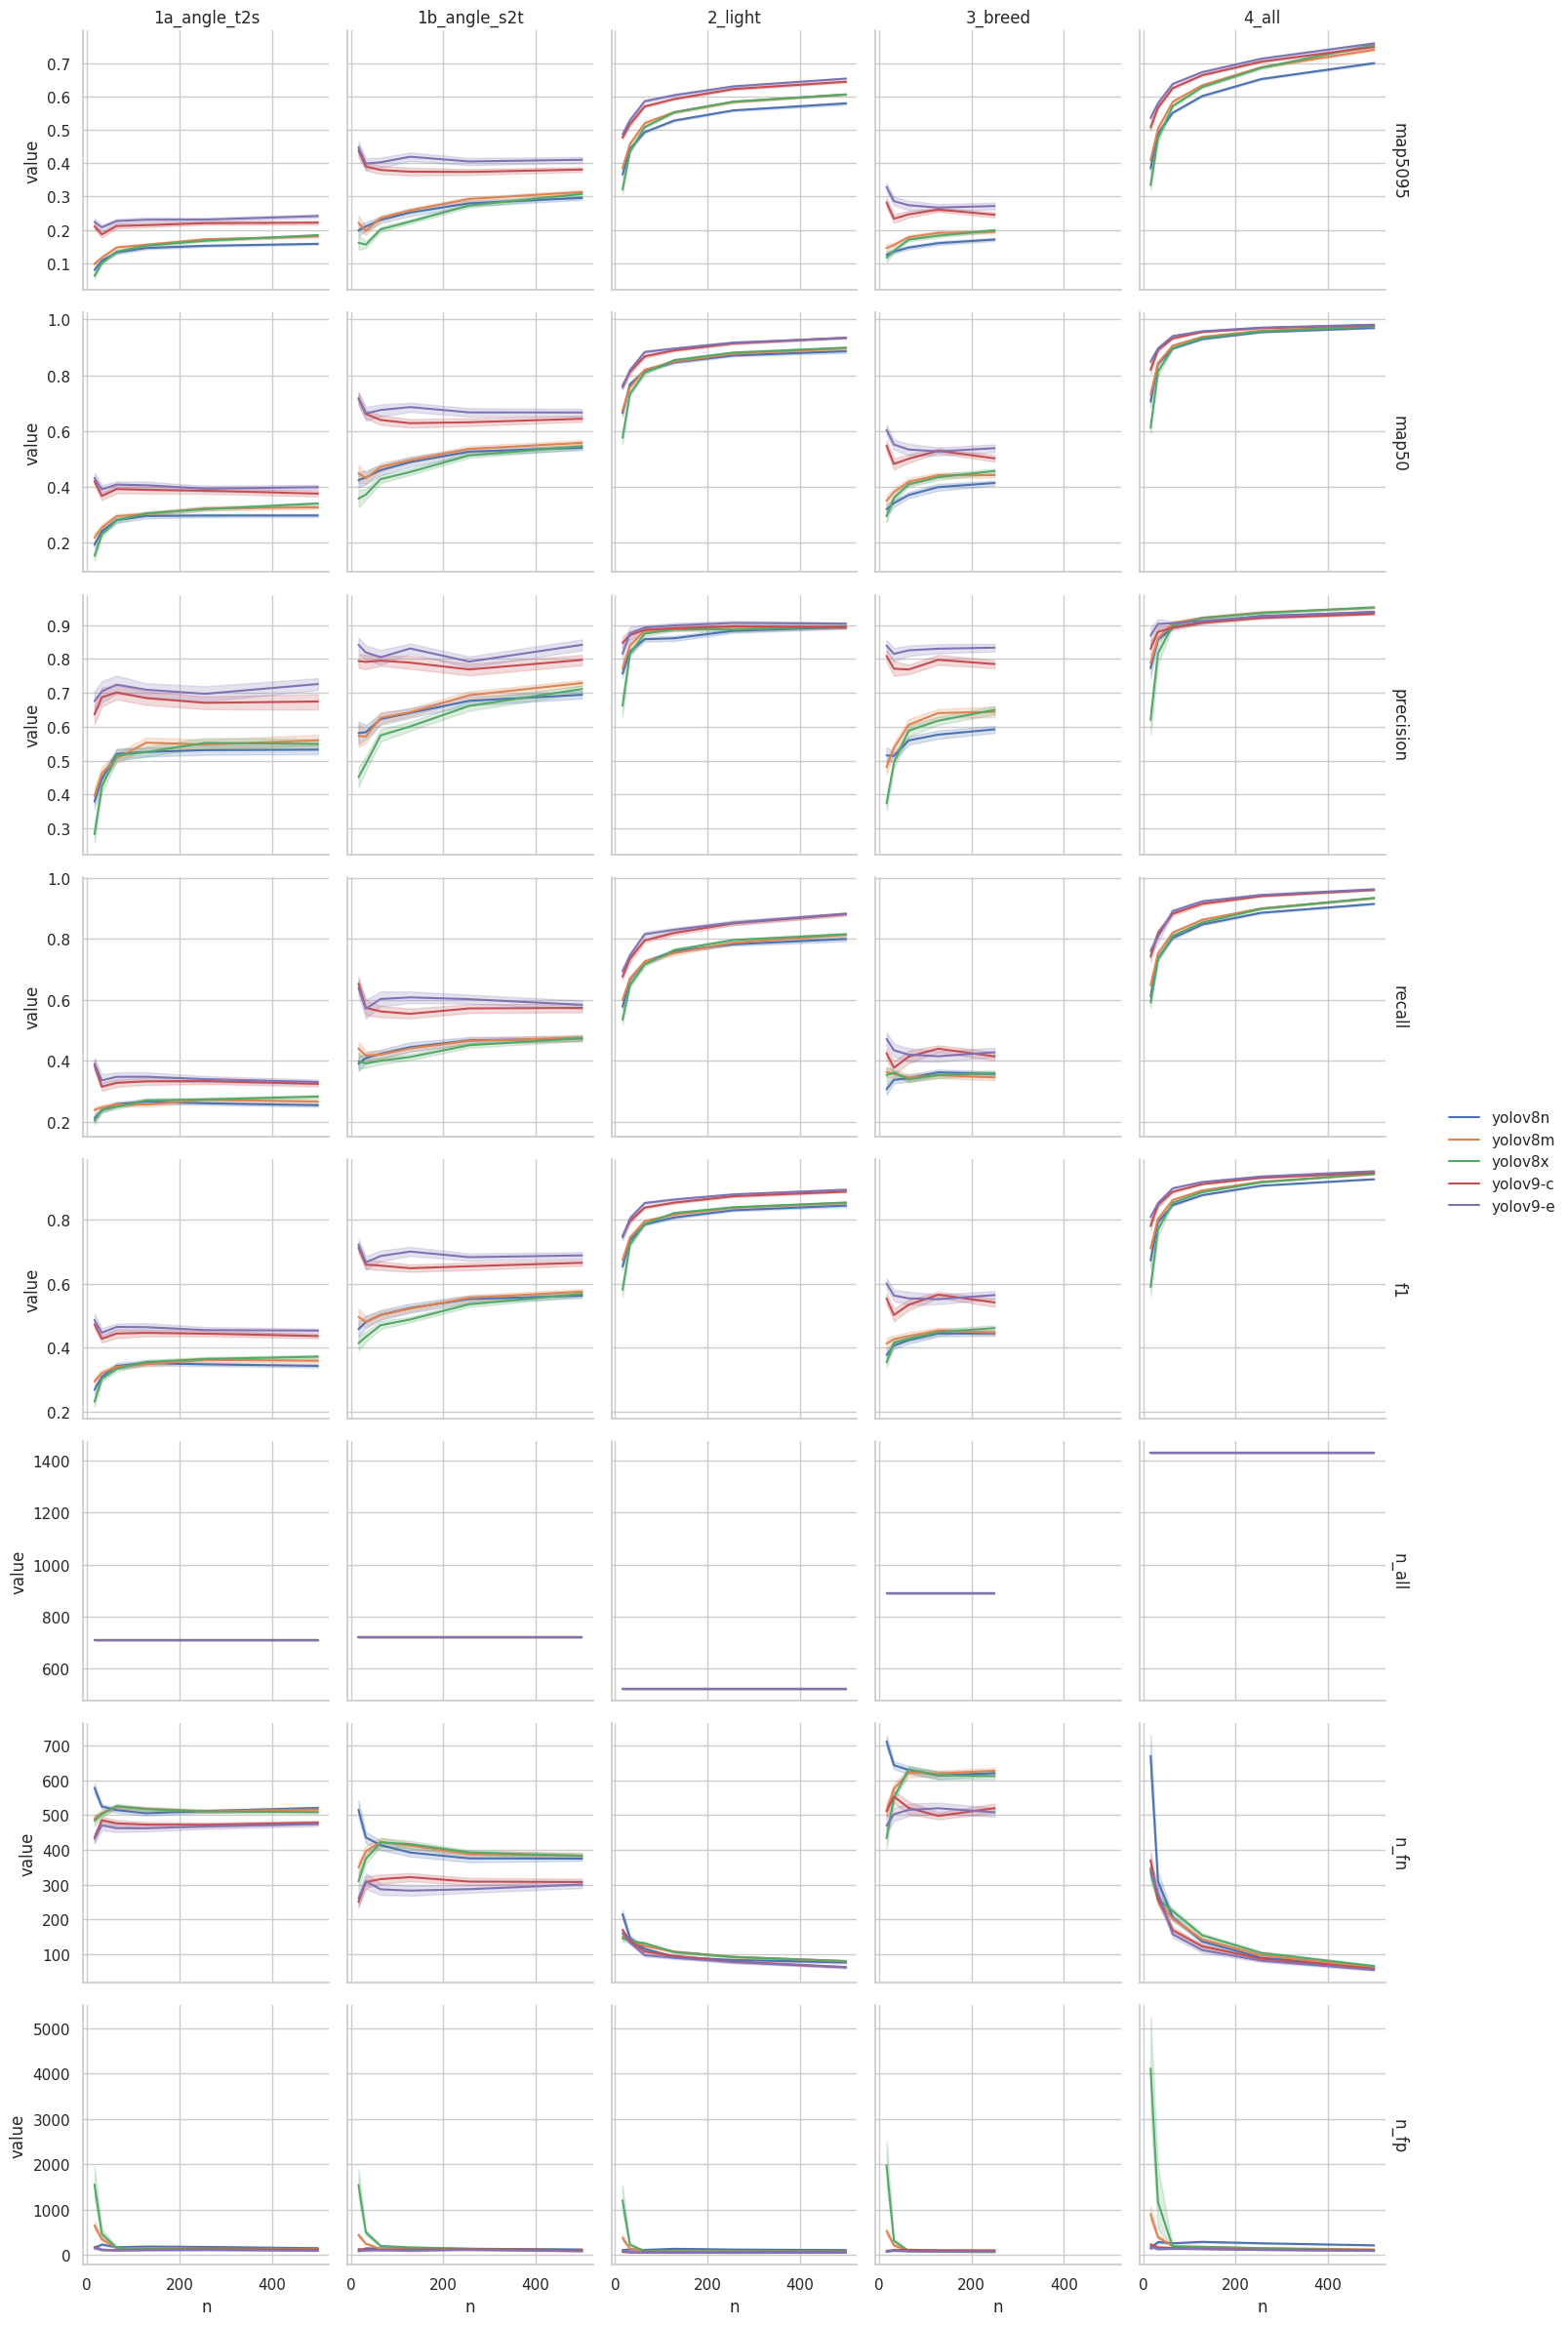

In [9]:
# x is n
# y is map50
# hue is model
# facet is config
sns.set(style="whitegrid")
g = sns.FacetGrid(data_long,
                  col="config",
                  row="metric",
                  margin_titles=True,
                  sharey='row',)
g.map(sns.lineplot, "n", "value", "model")
# g.set_axis_labels("n", "map50")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend()
plt.show()